In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Section 3(A) Answer:

In [3]:
boston = pd.read_csv('https://cdn.iisc.talentsprint.com/CDS/Datasets/boston.csv')
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
data = boston.iloc[:,:-1]
target = boston.iloc[:,-1]

In [8]:
boston.shape

(506, 14)

In [11]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<ipython-input-15-3c61dbaad2b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


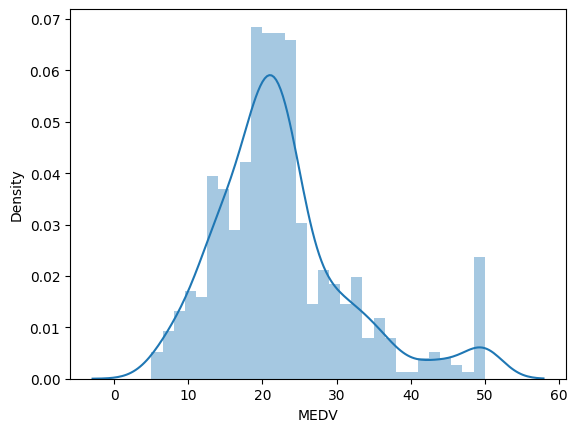

In [15]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

# Section 3(B) Answer

Linear Regression

In [16]:
model_lrg = LinearRegression()
model_lrg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred_lrg = model_lrg.predict(X_test)

Decision Treee

In [18]:
model_dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1234)

In [26]:
y_pred_dt = model_dt.predict(X_test)

Random Forest

In [23]:
model_rf = RandomForestRegressor(n_estimators=500, random_state=12)
model_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=12)

In [27]:
y_pred_rf = model_rf.predict(X_test)

# Section 3(C) Answer

In [28]:
rmse_lrg = np.sqrt(mean_squared_error(y_test, y_pred_lrg))
print('rmse for linear regression:', rmse_lrg)

rmse for linear regression: 5.309659665032172


In [29]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('rmse for linear regression:', rmse_dt)

rmse for linear regression: 6.901062125948513


In [30]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('rmse for linear regression:', rmse_rf)

rmse for linear regression: 4.312298303598169
